### Exercise 6: Stochastic simulation of gating

We start by defining the transition matrix for the following Markov model:

<img src="fig/coi.png" width=700>

**Exercise (6a)**

In equilbrium there is a certain probability that the channel is in the open state $O$. Can you derive a mathematical expression for this in terms of the rate constants? 

Hint: Write down the ODE for $\dot{C}$. Solve $\dot{C}=0$ to express $C$ in terms of $O$. Repeat for $I$. Finally use $C+O+I = 1$.

**Answer:** $O = \frac{1}{k_{oc}/k_{co}+ k_{oi}/k_{io}+1}$ 

**Implementation**

Run the cells below and observe the results. You will find exercises interspersed with the code



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the matrix for the three state Markov Model (C,O,I)
def transition_matrix(k_co, k_oc, k_oi, k_io):

    C = 0;
    O = 1;
    I = 2; 

    n = 3;
    A = np.zeros((n,n))

    A[C, O] = k_co;
    A[O, C] = k_oc;
    A[O, I] = k_oi;
    A[I, O] = k_io;
    

    # needs to do this for dy/dt = A*y to be correct:
    A = A.transpose()

    # we have only filled in the positive contributions
    # we can figure out the negative ones from those:
    for i in range(n):
        A[i,i] = -A[:,i].sum()

    return A


Here we set the constants and compute an actual matrix:

In [43]:
k_co, k_oc, k_oi, k_io = 5, 10, 1, 0
A = transition_matrix(k_co, k_oc, k_oi, k_io)
print(A)

[[ -5.  10.   0.]
 [  5. -11.   0.]
 [  0.   1.  -0.]]


And here we define the ODE system:

In [44]:
def ode_system(y, t, A):
    
    dy = np.dot(A,y)
    return dy


Defining the initial condition for the ODE system:

In [45]:
Y0 = np.array([1,0,0]) # Start in closed state [0]

Solving the ODE and plotting the solution:

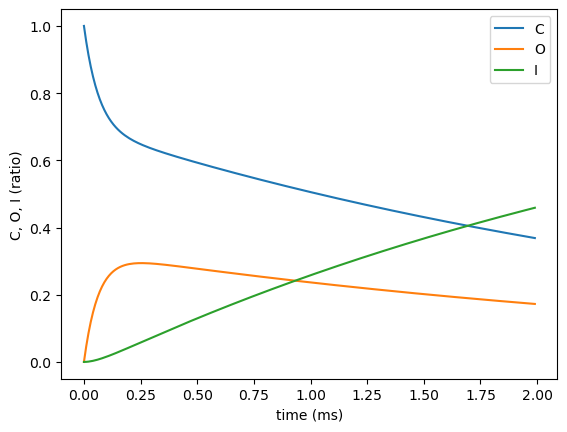

In [46]:
dt = 0.01;
t = np.arange(0,2,dt)
Y = odeint(ode_system, Y0, t, (A,))
plt.plot(t,Y); plt.legend(('C','O','I'))
plt.xlabel('time (ms)')
plt.ylabel('C, O, I (ratio)')
plt.show()


**Exercise 6b)**

Extend the simulation time such that the solution is closer to steady state.

Below is the code for stochastic simulation. Given a state and a small time step, the next state is computed based on the transition matrix.

In [47]:
def advance(state, A, dt):

    P = A[:,state]*dt; 
    P[state] = 0;
    CP = np.cumsum(P);

    random_number = np.random.rand();
    for i in range(len(CP)):

        if random_number < CP[i]:
            state = i;
            return state

    return state

**Stochastic simulation of a single gate**

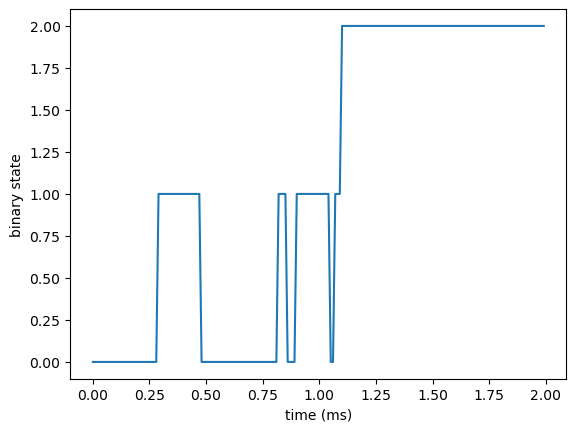

In [48]:
s = np.zeros(len(t),'i')
s[0] = 0;
for i in range(len(t)-1):
    s[i+1]  = advance(s[i], A, dt)
    
plt.plot(t,s)
plt.ylabel('binary state')
plt.xlabel('time (ms)')
plt.show()


**Exercise 6c)**

Try and run this several times. Notice that the outcome changes each time, but there is also a pattern.

The Inactived state [2] seems to absorbing, i.e. if you end up there it never exits again. 
Why? 

Can you change the model so that this does not happen? **Answer:** Increase $k_{io} > 0$

**Taking the average over $N$ channels**

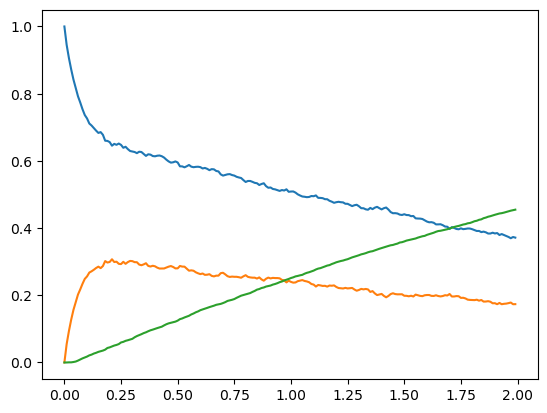

In [49]:
N = 5000  # a larger value will give results closer to the deterministic solution (cardiac cells have around 20,000)
S = np.zeros((len(t),N),'i')
for n in range(N):
    S[0,n] = 0;
    for i in range(len(t)-1):
        S[i+1,n]  = advance(S[i,n], A, dt)
    
p0 = np.mean(S==0,1)
p1 = np.mean(S==1,1)
p2 = np.mean(S==2,1)
plt.plot(t,p0,t,p1,t,p2); plt.show()

**Exercise 6d)**

Plot the stochastic solution and the deterministic solution in the same figure.
How large must N be for the two to become similar? **Answer:**(>~5000)

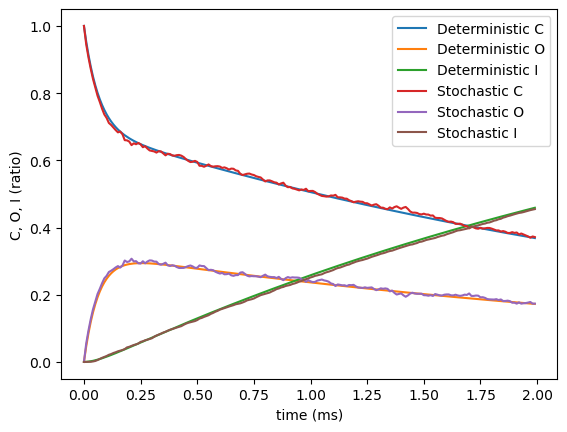

In [50]:
# write your plotting command here
plt.plot(t,Y);
plt.plot(t,p0,t,p1,t,p2); 
plt.legend(('Deterministic C','Deterministic O','Deterministic I','Stochastic C','Stochastic O','Stochastic I'))
plt.xlabel('time (ms)')
plt.ylabel('C, O, I (ratio)')
plt.show()